In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import warnings
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline

In [2]:
weather_train = pd.read_csv('files/weather_train.csv')
weather_train['timestamp'] = pd.to_datetime(weather_train['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
weather_test = pd.read_csv('files/weather_test.csv')
weather_test['timestamp'] = pd.to_datetime(weather_test['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')

In [11]:
cloud_coverage_filler = weather_train.groupby(['site_id','day','month'])['cloud_coverage'].mean()

KeyError: 'day'

In [3]:
display(weather_train.head())
display(weather_test.head())

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [4]:
# timestamp = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in weather['timestamp'] ]

In [6]:
missing_val_count_by_column = (weather_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64


In [7]:
labels = [
#     'air_temperature',
    'cloud_coverage',
#     'dew_temperature',
    'precip_depth_1_hr',
    'sea_level_pressure',
#     'wind_direction',
#     'wind_speed'
]

In [9]:
for site_id in range(16):
    weather_site = weather_train[weather_train['site_id']==site_id]
    for label in labels:
        print('Site {} , {} is {}.'.format(site_id, label, weather_site[label].isnull().sum()/len(weather_site)))

Site 0 , cloud_coverage is 0.43602003642987247.
Site 0 , precip_depth_1_hr is 0.00011384335154826958.
Site 0 , sea_level_pressure is 0.009676684881602914.
Site 1 , cloud_coverage is 0.8058883943854844.
Site 1 , precip_depth_1_hr is 1.0.
Site 1 , sea_level_pressure is 0.005934040853588954.
Site 2 , cloud_coverage is 0.2680177615848799.
Site 2 , precip_depth_1_hr is 0.007514516679949903.
Site 2 , sea_level_pressure is 0.005009677786633269.
Site 3 , cloud_coverage is 0.41480637813211846.
Site 3 , precip_depth_1_hr is 0.004214123006833713.
Site 3 , sea_level_pressure is 0.017995444191343964.
Site 4 , cloud_coverage is 0.48161220539678923.
Site 4 , precip_depth_1_hr is 0.14994876465900034.
Site 4 , sea_level_pressure is 0.008311510873277923.
Site 5 , cloud_coverage is 0.6887492861222159.
Site 5 , precip_depth_1_hr is 1.0.
Site 5 , sea_level_pressure is 1.0.
Site 6 , cloud_coverage is 0.34069687998178094.
Site 6 , precip_depth_1_hr is 0.0.
Site 6 , sea_level_pressure is 0.019927123662035983.

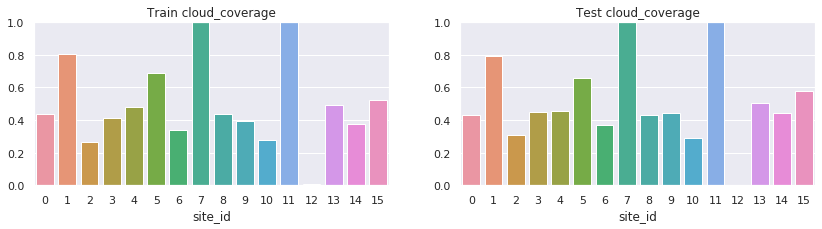

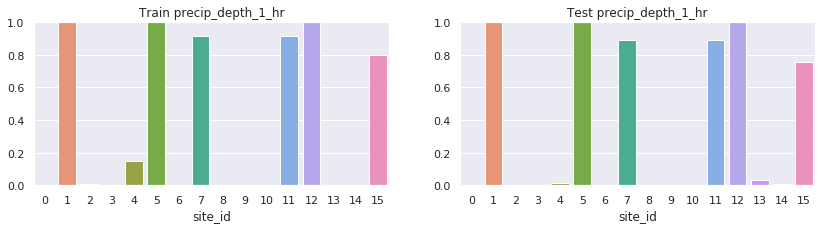

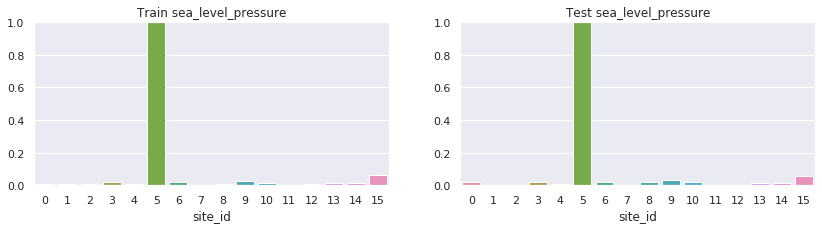

In [10]:
for label in labels:
    missing_train = []
    missing_test = []
    x = list(range(0,16,1))
    for site_id in range(16):
        weather_site = weather_train[weather_train['site_id']==site_id]
        missing_train.append( weather_site[label].isnull().sum()/len(weather_site) )
    for site_id in range(16):
        weather_site = weather_test[weather_test['site_id']==site_id]
        missing_test.append( weather_site[label].isnull().sum()/len(weather_site) )
    
#     fig = sns.barplot(x=x, y=missing_train)
#     fig.set(xlabel='site_id', title='Train {}'.format(label), ylim=(0,1))
#     plt.show()
#     fig2 = sns.barplot(x=x, y=missing_test)
#     fig2.set(xlabel='site_id', title='Test {}'.format(label), ylim=(0,1))
#     plt.show()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))
    
    sns.barplot(x=x, y=missing_train,ax=ax1)
    ax1.set(xlabel='site_id', title='Train {}'.format(label), ylim=(0,1))
    sns.barplot(x=x, y=missing_test,ax=ax2)
    ax2.set(xlabel='site_id', title='Test {}'.format(label), ylim=(0,1))
    plt.show()

In [ ]:
weather_site = weather[weather['site_id']==0]

In [ ]:
weather_train[weather_train['precip_depth_1_hr']>0]['precip_depth_1_hr'].describe()